In [1]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# UniCat

In [4]:
con = sqlite3.connect("unicat_holdings.db")

Import the libcitation scores from the SQL database of the UniCat data.

In [7]:
df = pd.read_sql(
    """
    SELECT library_count, COUNT(work_id) counts
    FROM (
        SELECT work_id, COUNT(DISTINCT location) library_count
        FROM holding
        GROUP BY work_id
    )
    GROUP BY library_count 
    """,
    con,
)

In [8]:
df.head(2)

,library_count,counts
0,1,4778
1,2,3475


The following is a size-frequency plot of the library counts of the UniCat library.

<AxesSubplot:xlabel='library_count', ylabel='counts'>

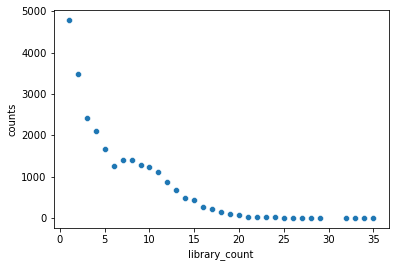

In [9]:
sns.scatterplot(data=df, x="library_count", y="counts")

The following is a size-frequency plot on a log-log scale of the library counts of the UniCat data.

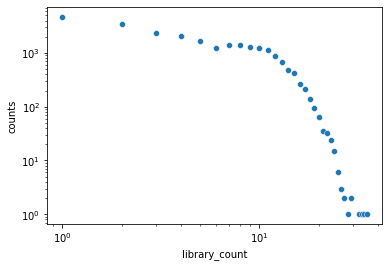

In [10]:
p = sns.scatterplot(data = df, x="library_count", y="counts")
p.set(xscale="log", yscale="log")

plt.savefig("plots/Unicat_log_size-freq.png")

# Cultuurconnect scores 

In [17]:
con = sqlite3.connect("cultuurconnect.db")

In [18]:
df = pd.read_sql(
    """
    SELECT library_count, COUNT(frabl) counts
    FROM (
        SELECT frabl, COUNT(DISTINCT library) library_count
        FROM holding
        GROUP BY frabl
    )
    GROUP BY library_count 
    """,
    con,
)

### simple scatterplot

The following is a size-frequency plot of the Cultuurconnect library count data.

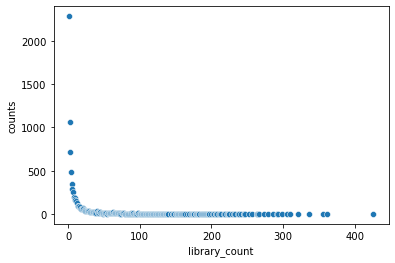

In [19]:
sns.scatterplot(data = df, x="library_count", y="counts");

The following is a size-frequency plot on a log-log scale for the library counts of the Cultuurconnect data.

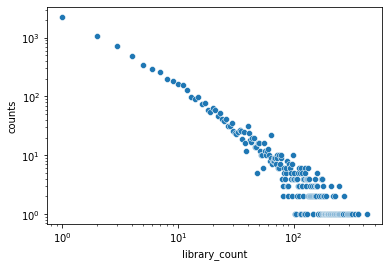

In [21]:
p = sns.scatterplot(data = df, x="library_count", y="counts")
p.set(xscale="log", yscale="log")

plt.savefig("plots/Cultuurconnect_log_size-freq.png")